# CLEAN ENERGY PRODUCTION IN FRANCE-  FORECAST

## Dataset presentation

- Input:
  - Population in france
    - Domain: France
    - Spatial resolution: France
    - Time resolution: Monthly
    - Period: 1975-2021
    - Units: Thousand of individuals
    - Source: [Insee](https://www.insee.fr/en/statistiques/serie/000436387#Graphique)
    
  - Temperature 
    - Domain: France
    - Spatial resolution: France
    - Time resolution: daily
    - Period: 1980-2018
    - Units: °K
    - Source: [MERRA-2 reanalysis](https://gmao.gsfc.nasa.gov/reanalysis/MERRA-2/)
    
  - Consumption
    - Domain: France
    - Spatial resolution: France
    - Time resolution: hourly
    - Period: 2012-2021
    - Units: (MW)
    - Source: [Réseaux énergies](https://opendata.reseaux-energies.fr/explore/dataset/eco2mix-national-cons-def/table/?disjunctive.nature&sort=-date_heure)
    
- Target:
  - Electricity production
    - Domain: France
    - Spatial resolution: France
    - Time resolution: hourly
    - Period: 2012-2020
    - Units: MW
    - Source: [Réseaux énergies](https://opendata.reseaux-energies.fr/explore/dataset/eco2mix-national-cons-def/table/?disjunctive.nature&sort=-date_heure)


### Clean energy production
Government has introduced changes in the public policy in France in order to take action and invest in alternative renewable energy sources. France plan is in line with the Paris agreeements at international level and with the law “Energy Transition for Green Growth“. Some objectives are: closure of coal- based power plants, bane on shale gas explorations and no new license for hydrocarbons explorations delivered. Besides, an acceleration of the changes toward well-balanced energy production, carbon free.

The "Agence de la transition écologique (ADEME)" has a prospective for the electric production in France for 2030 of about 97% being clean energies. The main objective of this project is to determine the production of clean energy in 2030 according to the current rate production compared with the consumption and establish how much the increase in production should be during this decade to achieve the goal indicated by ADEME. 

<img alt="energy" src="Clean-200-cover.png">

## 1. Packages

In [1]:
import netCDF4 as nc
import matplotlib.pyplot as plt
import xarray as xr
import pandas as pd
import numpy as np
from tabulate import tabulate 

## 2. Reading data

In [2]:
#Consumption and production data
df_cons = pd.read_table('C:/Users/ASUS/Downloads/Tutorials/projects/eco2mix-national-cons-def.csv',delimiter =";",index_col=0, header=0, parse_dates=True).dropna()
df_cons_day = df_cons[['Consommation (MW)','Nucléaire (MW)','Eolien (MW)','Solaire (MW)','Hydraulique (MW)','Bioénergies (MW)']].resample('D').mean()
df_cons_day['Total production'] = df_cons_day[['Nucléaire (MW)','Eolien (MW)','Solaire (MW)','Hydraulique (MW)','Bioénergies (MW)']].sum(axis=1)

#France population
df_popu = pd.read_table('C:/Users/ASUS/Downloads/Tutorials/projects/monthly_values.csv',delimiter =";",index_col=0, header=0, parse_dates=True)
df_population = df_popu[['Population- Metropolitan France']]
df_population['Month'] = np.arange(df_population.shape[0])

#Temperature in France
ds_temperature = xr.open_dataset('C:/Users/ASUS/Downloads/Tutorials/projects/climate_sirta/merra2/merra2/merra2_surface_temperature_max_day_19800101-20190101.nc')
#ds_temperature = xr.open_dataset('C:/Users/ASUS/Downloads/Tutorials/projects/climate_france/merra2_area_selection_output_surface_temperature_merra2_2010-2019.nc')
df_temperature = ds_temperature.to_dataframe()
df_temperature_win = df_temperature.iloc[(df_temperature.index.month >= 1) & (df_temperature.index.month <= 3)]
df_temperature_win_year = df_temperature_win.resample('AS').mean()

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3338: DtypeWarning: Columns (23,28) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):
<ipython-input-2-f0e5b2966097>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_population['Month'] = np.arange(df_population.shape[0])


##  3. Preanalysis of input data

### 3.1 Population in france from 1975 to 2021

As a first hypothesis, it is considered that the size of population has an impact over the national consumption of energy. According to this, a projection of France's population is conducted in the next section in order to stablish its projection for 2030.

In [3]:
df_population['Population- Metropolitan France'].plot()
plt.xlabel('Year')
plt.ylabel('Population (thousands)')

Text(0, 0.5, 'Population (thousands)')

Population shows an stable upward trend  with a sligthly drecreasing in 2001.

### 3.2 Energy consumption and production of clean energies in France from 2013 to 2021

Text(0, 0.5, 'Consumption- Production (MW)')

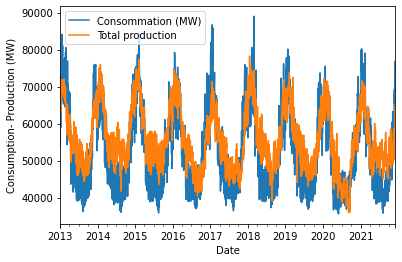

In [4]:
df_cons_day[['Consommation (MW)','Total production']].plot()
plt.xlabel('Date')
plt.ylabel('Consumption- Production (MW)')
df_cons_day[['Consommation (MW)','Total production']].iloc[(df_cons_day.index >= '2018-01-01 00:00:00-05:00') & (df_cons_day.index < '2018-12-31 00:00:00-05:00')].plot()
plt.ylabel('Consumption- Production (MW)')

Figures illustrate that the consumption and total clean energy production have a fluctuating trend over the time. The production of clean energies (as expected) varies with the same tendency as the consumption but it reaches lower values indicating that in this points the electricity demand is covered by fossil- fired energies (coal, natural gas, fuel) ot by the purchase of energy from other countries. According with the graph over 2018 year (and observing the other years), it is inferred that the months of greatest production correponds to the winter season. 

### 3.3 Temperature in France between 1980 and 2018

Text(0, 0.5, 'Temperature °K')

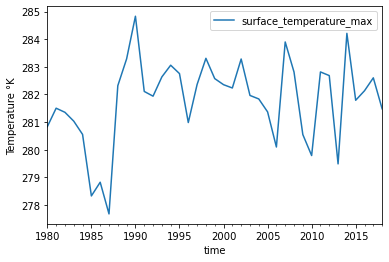

In [5]:
df_temperature[['surface_temperature_max']].plot()
plt.ylabel('Temperature °K')
df_temperature_win_year[['surface_temperature_max']].plot()
plt.ylabel('Temperature °K')

Graphs illustrate that the temperature has a fluctuating tendency with marked peaks that correspond to the lowest and highest temperatures reached along the winter and summer seasons. The second figure shows the variation of temperature over the years for winter season taking the mean value its three months each year. 

##  4. Analysis of data and forecast

In this section the forecast of the clean energy production is conducted as follows:

• First is projected the population in France for 2030 fitting a logistic curve to population growth. Since it is considered that it is an important variable for the energy production. 

• Second, the energy consumption is projected for 2030 conducting a multiple linear regression, considering the temperature of winter season and population as independent variables. The value of consumption for 2030 is computed using the projection of population for this year in the first step and using an observed temperature increase tendency of +0.3 °C per decade to compute an stimate value of temperature for winter season in 2030.

• Finally, the projection of clean energy production is conducted using a linear regression considering the current relation of production vs consumption. This allows to stablish what will be the clean energy production in 2030 according with the present capacity of production and what is the increase in capacity required to achieve the objective indicated in the introduction section.


### 4.1 Projection of population in France 

### Fitting a logistic curve to population growth

In this case I use a logistic regression curve that is a common S-shaped curve (sigmoid curve) that is usefull for modelling different phenomena such as population Growth. This is define by:


\begin{equation}
D(t)=\frac{L}{1+e^{-k(t-t_0)}}
\end{equation}

Parameters $k$, and $L$ are determined using a linear regression, and then $t_0$ is determined manually. Whit the coefficients of the linear regression $y=ax+b$, we compute compute $k=b, L=−k/a$.

In this case, the population data with a time scale of years is used.



In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
'Functions from local module:'
import tools as tl

First it is necessary to split the data into training and testing parts in order to avoid overfitting. For this it is used K-fold Cross validation.

In [7]:
df_pop_year = df_population[['Population- Metropolitan France']].resample('AS').mean()
df_pop_year['Year'] = np.arange(df_pop_year.shape[0])+1975

Year_train, Year_test, Pop_train, Pop_test = train_test_split(df_pop_year['Year'],df_pop_year['Population- Metropolitan France'],test_size=.3,random_state=0)
#df_pop_year.head()

If we differentiate D, it is obtained the following relationship:

\begin{equation}
\frac{dD}{dt}= kD \left(1-\frac{D}{L}\right)
\end{equation}

From this, it is inferred that there is a linear relation between the proportional growth rate $\frac{dD/dt}{D}$ and population $D$:

\begin{equation}
\frac{dD/dT}{D}= k\left(1-\frac{D}{L}\right)
\end{equation}

In the following is computing the proportional growth rate using finite differences with a first order forward scheme (find fuction in tools file) and is conducted the linear regression in order to get the parameters of the Sigmoid curve.


In [8]:
t = Year_train.values[:,None]
p = Pop_train.values[:,None]

#Computing the derivatives
Delta_p = tl.derivatives(p,t,0,1)
growth_rate = Delta_p/p

plt.plot(p,growth_rate,'.', color = 'r')
plt.xlabel('Population (thousands)')
plt.ylabel('Growth rate')

Text(0, 0.5, 'Growth rate')

It is done the linear regression taking into account all the points in the curve

In [9]:
#Reduce the data to perform correctly the linear regression
p_reg = np.delete(p, np.where(p <= 51000))[:,None]
growth_rate_reg = np.delete(growth_rate, np.where(p <= 51000))

#Linear regression
reg_pob = LinearRegression().fit(p_reg, growth_rate_reg)
print("The regression coefficient is {} ".format(reg_pob.coef_))
print("The intercept coefficient is {} ".format(reg_pob.intercept_))

#Results
growth_rate_pre=reg_pob.predict(p_reg)


plt.plot(p,growth_rate,'.')
plt.plot(p_reg,growth_rate_pre)
plt.xlabel('Population (thousands)')
plt.ylabel('Growth rate')

The regression coefficient is [-4.7593595e-08] 
The intercept coefficient is 0.007632919873927451 


Text(0, 0.5, 'Growth rate')

In [10]:
#Parameters of the sigmoid curve
k = reg_pob.intercept_
L = -k/reg_pob.coef_
to = 2069

#Computation of the sigmoid curve
def sig(k,l,t,to):
    return l/(1+np.exp(-k*(t-to)))

#Proyeccion of sigmoid curve from 1975 to 2150
tp = np.linspace(1975,2400,425)
p_proyection = sig(k,L,tp,to)

df_pop_year.plot('Year','Population- Metropolitan France')
plt.plot(tp,p_proyection, alpha = 0.4)
plt.xlabel('Year')
plt.ylabel('Population (thousands)')

#Residual sum of squares and coefficient of determination 
Ye_test = Year_test.values[:,None] #Adjust of data to vector
Po_test = Pop_test.values[:,None]  #Adjust of data to vector
p_pro_ev = sig(k,L,Ye_test,to) #Estimation of proyected values for the test data


RSS = ((Po_test- p_pro_ev)**2).mean() 
TSS = np.var(Po_test)
R2 = 1-(RSS/TSS)
print("\n The R2 coefficient of test data is {} ".format(R2))

#Estimation of the population of france for 2030
Pop_critic =  sig(k,L,2030,to)
print("\n The polulation in France for 2030 will be around {} ".format(Pop_critic))


 The R2 coefficient of test data is 0.9954450388323561 

 The polulation in France for 2030 will be around [68340.46980286] 


Text(0, 0.5, 'Population (thousands)')

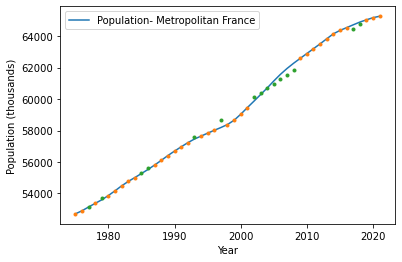

In [11]:
# Plot of the Sidmoid curve in data
df_pop_year.plot('Year','Population- Metropolitan France')
plt.plot(t,p,'.')
plt.plot(Ye_test,p_pro_ev,'.')
plt.xlabel('Year')
plt.ylabel('Population (thousands)')

### 4.2 Projection of the energy consumption in France 

In [12]:
#Adjust of data frames to the same time scale and creation of one that containing the match of data

#For consumption
df_cons_m = df_cons_day[['Consommation (MW)']].resample('MS').mean()
df_consumption_month = df_cons_m.iloc[(df_cons_m.index.month >= 1) & (df_cons_m.index.month <= 12)]
df_consumption_month.index = df_consumption_month.index.date
df_consumption_month.index.names = ['time']

#For population
df_population_month = df_population.iloc[(df_population.index.month >= 1) & (df_population.index.month <= 12)]
df_population_month.index = df_population_month.index.date
df_population_month.index.names = ['time']

#For temperature
df_temperature_month = df_temperature[['surface_temperature_max']].resample('MS').mean()-273.15
df_temperature_month.index = df_temperature_month.index.date
df_temperature_month.index.names = ['time']

#Creation of data frame with coincidence data
df_indep_vs_cons = pd.merge(df_population_month['Population- Metropolitan France'],df_consumption_month,on='time').merge(df_temperature_month,on='time')



In [13]:
# Revision of correlation between the variables
df_indep_vs_cons.corr()

Population- Metropolitan France  \
Population- Metropolitan France                         1.000000   
Consommation (MW)                                      -0.058377   
surface_temperature_max                                 0.126463   

                                 Consommation (MW)  surface_temperature_max  
Population- Metropolitan France          -0.058377                 0.126463  
Consommation (MW)                         1.000000                -0.943353  
surface_temperature_max                  -0.943353                 1.000000

<AxesSubplot:xlabel='surface_temperature_max', ylabel='Consommation (MW)'>

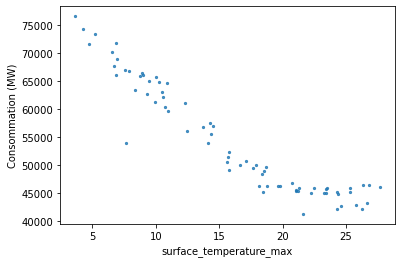

In [14]:
#Plots between the variables in order to stablish their relation
df_indep_vs_cons.plot(kind ='scatter', x='Population- Metropolitan France', y='Consommation (MW)', color = 'g', s=5, alpha = 0.8)
df_indep_vs_cons.plot(kind ='scatter', x='surface_temperature_max', y='Consommation (MW)', s=5, alpha = 0.8)

### Multiple Linear regression

First it is necessary to split the data into training and testing parts in order to avoid overfitting. For this it is used K-fold Cross validation.

In [15]:
Indep_train, Indep_test, Consump_train, Consump_test = train_test_split(df_indep_vs_cons[['Population- Metropolitan France','surface_temperature_max']],df_indep_vs_cons['Consommation (MW)'],test_size=.3,random_state=0)

The multiple Linear regression is an extended case of a simple linear regression and it is a better approach since it can directly accomodate multiple predictors. It is possible to do this giving each predictor a separate slope coefficient in a single model. The multiple relation model has the form:

\begin{equation}
Y=\beta_0+\beta_1 X_1+\beta_2 X_2+...+\beta_p X_p
\end{equation}



In [16]:
#Adjust of dimension of training and test data
Ind_train = Indep_train.values
Ind_test = Indep_test.values
Cons_train = Consump_train.values[:,None]
Cons_test = Consump_test.values[:,None]

#Multiple Linear regression
reg_cons = LinearRegression().fit(Ind_train, Cons_train)
print("The regression coefficients are {} ".format(reg_cons.coef_))
print("The intercept coefficient is {} ".format(reg_cons.intercept_))

#Proyeccion using the linear regression and test data
Cons_prediction = reg_cons.predict(Ind_test)

#coefficient of determination
print("The R2 coefficient of test data is {} ".format(reg_cons.score(Ind_test, Cons_test)))

#Estimation of the consumption for 2030
Temp_Critic = 9.45+0.3*1
Cons_Critic = np.array([[Pop_critic[0],Temp_Critic]])

Consumption_critic =  reg_cons.predict(Cons_Critic)
print("\n The consumption of energy in France for 2030 will be around {} (MW) ".format(Consumption_critic))

The regression coefficients are [[    2.38360382 -1352.6868929 ]] 
The intercept coefficient is [-77367.03756313] 
The R2 coefficient of test data is 0.9004735326432446 

 The consumption of energy in France for 2030 will be around [[72340.87038667]] (MW) 


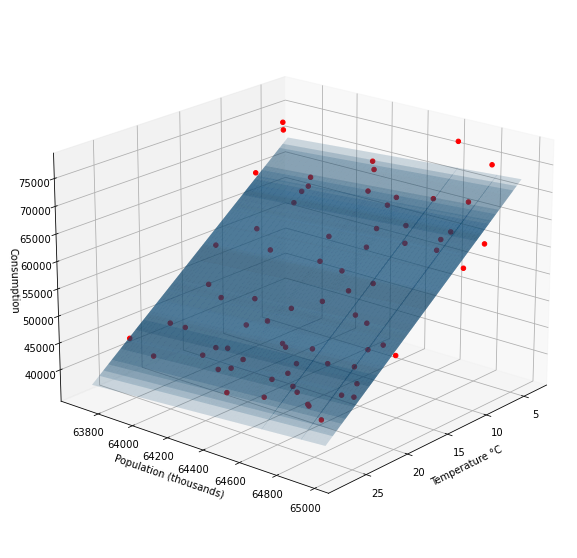

In [17]:
#Plot of plane resulting from linear regression and scatter of the dependent variable in function of temperature and population
X = df_indep_vs_cons['surface_temperature_max'].values[:,None]
Y = df_indep_vs_cons['Population- Metropolitan France'].values[:,None]
X, Y = np.meshgrid(X, Y)
Z = reg_cons.intercept_ + (reg_cons.coef_[0,1] * X) + (reg_cons.coef_[0,0] * Y)


fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, edgecolor='none', alpha=0.1)
ax.scatter(df_indep_vs_cons['surface_temperature_max'], df_indep_vs_cons['Population- Metropolitan France'], df_indep_vs_cons['Consommation (MW)'], c = 'r',  alpha=1)
ax.view_init(20, 40)
ax.set_xlabel('Temperature °C')
ax.set_ylabel('Population (thousands)')
ax.set_zlabel('Consumption')
plt.show()


### 4.3 Projection of the clean energy production in France

<AxesSubplot:xlabel='Consommation (MW)', ylabel='Total production'>

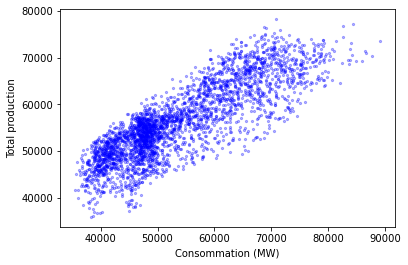

In [18]:
#Plot of the variables
df_cons_day.plot(kind = 'scatter', x = 'Consommation (MW)', y = 'Total production', color = 'b', s = 5, alpha = 0.3)

In [19]:
df_cons_day.corr()

Consommation (MW)  Nucléaire (MW)  Eolien (MW)  \
Consommation (MW)           1.000000        0.816195     0.238261   
Nucléaire (MW)              0.816195        1.000000     0.080385   
Eolien (MW)                 0.238261        0.080385     1.000000   
Solaire (MW)               -0.592647       -0.649075    -0.135509   
Hydraulique (MW)            0.427500        0.339473     0.015827   
Bioénergies (MW)            0.094200       -0.088903     0.362534   
Total production            0.840457        0.919699     0.356669   

                   Solaire (MW)  Hydraulique (MW)  Bioénergies (MW)  \
Consommation (MW)     -0.592647          0.427500          0.094200   
Nucléaire (MW)        -0.649075          0.339473         -0.088903   
Eolien (MW)           -0.135509          0.015827          0.362534   
Solaire (MW)           1.000000         -0.196352          0.321951   
Hydraulique (MW)      -0.196352          1.000000         -0.155165   
Bioénergies (MW)       0.321951         -0.155165          1.000000   
Total production      -0.563136          0.555797          0.029251   

                   Total production  
Consommation (MW)          0.840457  
Nucléaire (MW)             0.919699  
Eolien (MW)                0.356669  
Solaire (MW)              -0.563136  
Hydraulique (MW)           0.555797  
Bioénergies (MW)           0.029251  
Total production           1.000000

### Linear regression

First it is necessary to split the data into training and testing parts 

In [20]:
Consumption_train, Consumption_test, Production_train, Production_test = train_test_split(df_cons_day['Consommation (MW)'],df_cons_day['Total production'],test_size=.3,random_state=0)

Now is conducting the linear regression

In [21]:
#Adjust of dimension of training and test data
Con_train = Consumption_train.values[:,None]
Con_test = Consumption_test.values[:,None]
Prod_train = Production_train
Prod_test = Production_test

#Multiple Linear regression
reg_prod = LinearRegression().fit(Con_train, Prod_train)
print("The regression coefficients is {} ".format(reg_prod.coef_))
print("The intercept coefficient is {} ".format(reg_prod.intercept_))

#Proyeccion using the linear regression and test data
prod_prediction = reg_prod.predict(Con_test)

#coefficient of determination
print("The R2 coefficient of test data is {} ".format(reg_prod.score(Con_test, Prod_test)))


#Estimation of the clean production energy necessary for 2030
Energy_Critic = reg_prod.predict(Consumption_critic)
print("\n The maximum clean energy that will be generated in France in 2030 will be around {} (MW)".format(Energy_Critic))

The regression coefficients is [0.61863142] 
The intercept coefficient is 22902.790556590953 
The R2 coefficient of test data is 0.7111192282410158 

 The maximum clean energy that will be generated in France in 2030 will be around [67655.1256426] (MW)


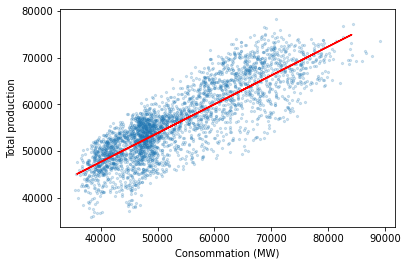

In [22]:
# Plot of the regression vs data
df_cons_day.plot(kind='scatter', x='Consommation (MW)', y='Total production', s=5, alpha = 0.2)
plt.plot(Con_test,prod_prediction,'r')


##  5. Discussion

The clean energy production in 2030 will be about 67655 (MW), while the consumption is projected in 72340 (MW). This means that there will be a gap between them of 6,5%. According to the objective of the Agence de la transition écologique this percentage should be 2.9% so it is necessary to have an increasing in the current capactity of 3.6% approximately. 
Relatig to the methods, it is considered that the projections (according with the variables considered) will be quite precisely  since they showed a coefficient of determination (using the test data) of 0,99, 0,90 and 0,71 for the projection of population, consumption and production respectively.

Finally, it is remarkably that the hypothesis about a strong correlation between the population and the consumption was not valid, since the coefficient of correlation between the variables was considerably low. This means that if the regression were conducted considering only the temperature variable the result value of the coefficient of determination will not vary significantly.

##  6. Bibliography

• Climat : l’évolution constatée en France | Météo-France. (n.d.). METEO FRANCE. Retrieved January 1, 2021, from https://meteofrance.com/changement-climatique/observer/climat-levolution-constatee-en-france

• Victanis Advisory Services GmbH. (n.d.). Market Review of Renewable Energy in France. Victanis. Retrieved January 11, 2021, from https://www.victanis.com/renewable-energy-france-market-review


<!--bibtex

@Article{PER-GRA:2007,
  Author    = {P\'erez, Fernando and Granger, Brian E.},
  Title     = {{IP}ython: a System for Interactive Scientific Computing},
  Journal   = {Computing in Science and Engineering},
  Volume    = {9},
  Number    = {3},
  Pages     = {21--29},
  month     = may,
  year      = 2007,
  url       = "http://ipython.org",
  ISSN      = "1521-9615",
  doi       = {10.1109/MCSE.2007.53},
  publisher = {IEEE Computer Society},
}

... Other Bibtex entries go here.

-->